# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10, record_each=16, 
            homeo_method='HAP', eta_homeo=0.05, alpha_homeo=0.02,
            learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (81920, 256) - done in 0.19s.


## White Noise Initialization + Learning

loading the dico called : data_cache/DICT_INIT_WHITE_dico.pkl


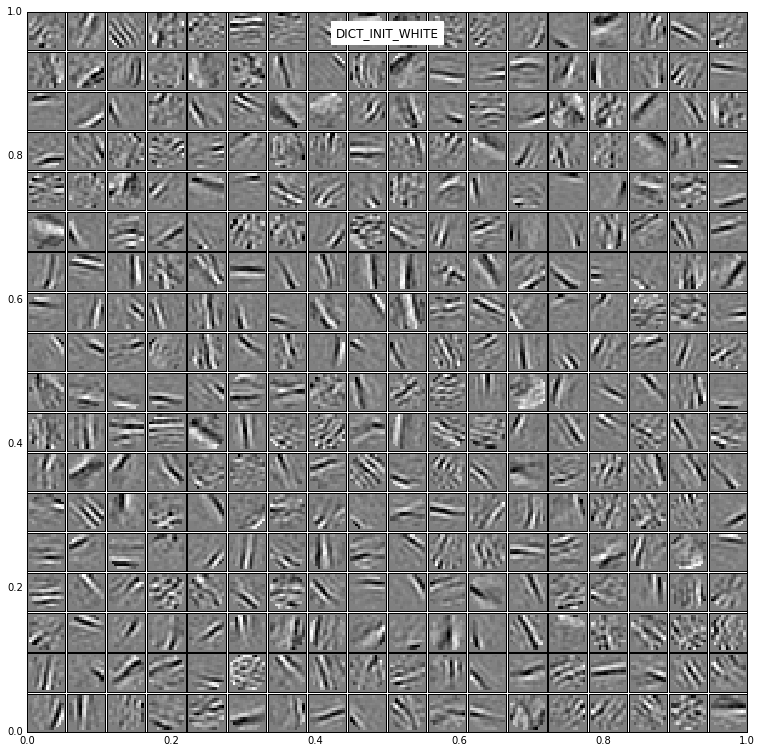

In [4]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

loading the dico called : data_cache/DICT_INIT_OVF_dico.pkl


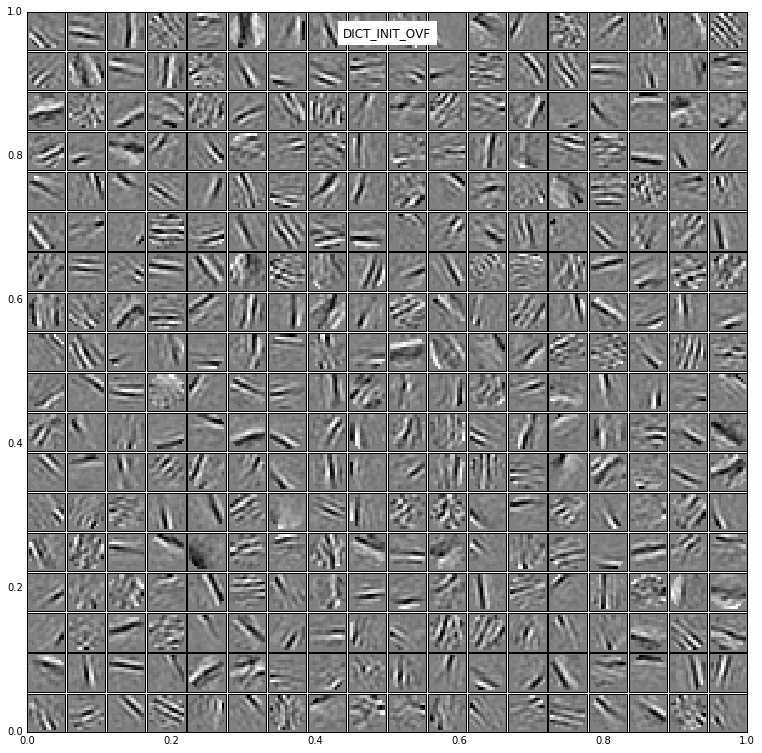

In [5]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

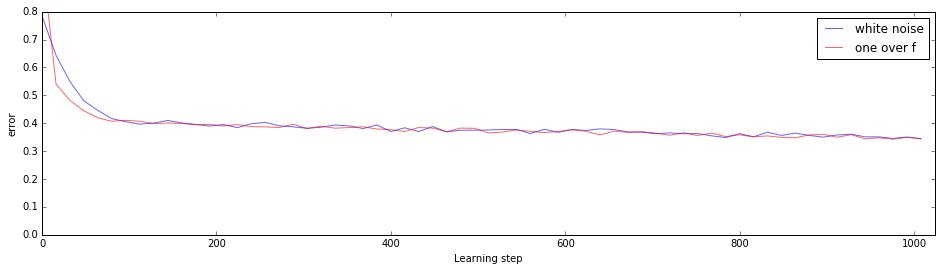

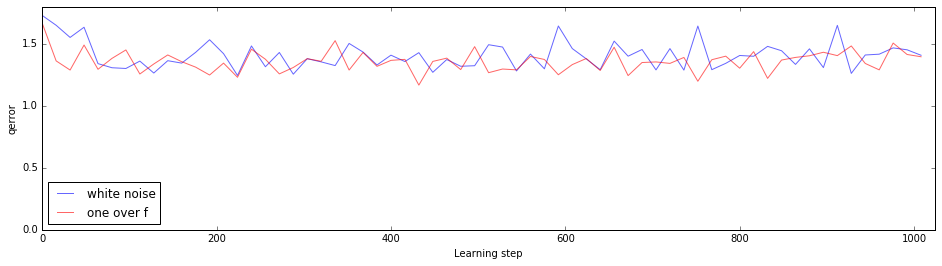

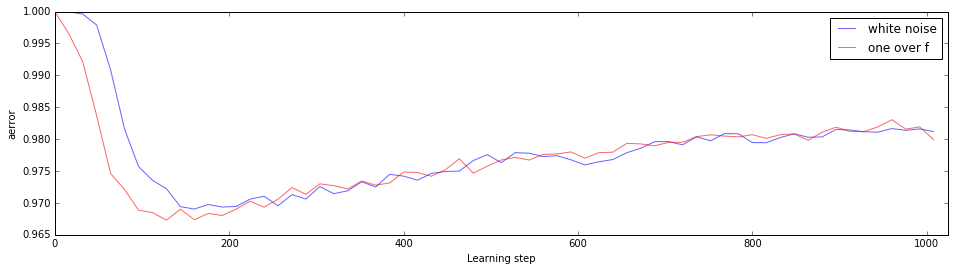

In [6]:
for variable in ['error', 'qerror', 'aerror']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_w, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='white noise')
    fig_error, ax_error = shl.time_plot(dico_1oF, variable=variable, fig=fig_error, ax=ax_error, color='red', label='one over f')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.5.2 64bit [GCC 5.4.0 20160609]
IPython 6.2.1
OS Linux 4.13.0 32 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.14.0
shl_scripts 20171221
pandas 0.22.0
Fri Feb 09 15:48:49 2018 CET